In [1]:
import warnings
warnings.filterwarnings('ignore')
from transformers import (
    LlamaForCausalLM,
    pipeline,
    AutoTokenizer,AutoModelForCausalLM,
    LlamaModel,AutoModel,
    LlamaConfig, Qwen2VLForConditionalGeneration,
    BertTokenizer, BertModel
)
import transformers
import json
from datasets import load_dataset
import torch
from langchain import PromptTemplate, LLMChain
from langchain.llms import HuggingFacePipeline

In [2]:
model_dir = "/data/Models/bert-base-cased"
dataset_dir = "/data/Datasets/nyu-mll_glue"

In [3]:
model_dir = "/data/Models/bert-large-cased"
dataset_dir = "/data/Datasets/nyu-mll_glue"

In [4]:
# 加载 GLUE 数据集，默认为 'sst2' 任务，可以换成其他任务如 'mnli'、'qqp' 等
dataset = load_dataset(dataset_dir, "sst2")
# 获取测试集
test_set = dataset["test"]
# 打印测试集的前10条数据
# test_set
# for i in range(10):
#     print(test_set[i])
test_sentences = [test_set[i]['sentence'] for i in range(10)]
test_sentences

['uneasy mishmash of styles and genres .',
 "this film 's relationship to actual tension is the same as what christmas-tree flocking in a spray can is to actual snow : a poor -- if durable -- imitation .",
 'by the end of no such thing the audience , like beatrice , has a watchful affection for the monster .',
 'director rob marshall went out gunning to make a great one .',
 'lathan and diggs have considerable personal charm , and their screen rapport makes the old story seem new .',
 'a well-made and often lovely depiction of the mysteries of friendship .',
 "none of this violates the letter of behan 's book , but missing is its spirit , its ribald , full-throated humor .",
 "although it bangs a very cliched drum at times , this crowd-pleaser 's fresh dialogue , energetic music , and good-natured spunk are often infectious .",
 'it is not a mass-market entertainment but an uncompromising attempt by one artist to think about another .',
 'this is junk food cinema at its greasiest .']

In [5]:
intermediate_outputs = {}

In [6]:
def hook_func(module, inputs, outputs, layer_idx):
    intermediate_outputs[layer_idx] = outputs[0]

In [7]:
tokenizer = BertTokenizer.from_pretrained(model_dir)
bert_model = BertModel.from_pretrained(model_dir)

In [8]:
for layer_idx, layer in enumerate(bert_model.encoder.layer):
    layer.register_forward_hook(
        lambda m, inp, out, idx=layer_idx: hook_func(m, inp, out, idx)
    )

In [9]:
text = "Replace me by any text you'd like."
# test_sentences = [
#     "Replace me by any text you'd like.",
#     "One apple one day, keep the doctor away",
#     "What is the captial of China"
# ]
input_ids = tokenizer(test_sentences, padding=True, truncation=True, return_tensors="pt").input_ids
input_ids
# output = model(**encoded_input)

tensor([[  101, 16782,  1940,  2737, 21575,  1104,  6739,  1105, 11688,   119,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [  101,  1142,  1273,   112,   188,  2398,  1106,  4315,  6646,  1110,
          1103,  1269,  1112,  1184, 22572, 12937,  7941,   118,  2780, 24117,
          1158,  1107,   170, 13477,  1169,  1110,  1106,  4315,  4883,   131,
           170,  2869,   118,   118,  1191,  3840,  9739,   118,   118, 24190,
           119,   102],
        [  101,  1118,  1103,  1322,  1104,  1185,  1216,  1645,  1103,  3703,
           117,  1176,  3222, 10835,   117,  1144,   170,  2824,  2365, 12721,
          1111,  1103,  7121,   119,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
    

In [10]:
with torch.no_grad():
    bert_out = bert_model(input_ids)
# bert_out

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


In [11]:
for layer_idx, tensor in intermediate_outputs.items():
    print(f"Layer {layer_idx}: {tensor.shape}")

Layer 0: torch.Size([10, 42, 1024])
Layer 1: torch.Size([10, 42, 1024])
Layer 2: torch.Size([10, 42, 1024])
Layer 3: torch.Size([10, 42, 1024])
Layer 4: torch.Size([10, 42, 1024])
Layer 5: torch.Size([10, 42, 1024])
Layer 6: torch.Size([10, 42, 1024])
Layer 7: torch.Size([10, 42, 1024])
Layer 8: torch.Size([10, 42, 1024])
Layer 9: torch.Size([10, 42, 1024])
Layer 10: torch.Size([10, 42, 1024])
Layer 11: torch.Size([10, 42, 1024])
Layer 12: torch.Size([10, 42, 1024])
Layer 13: torch.Size([10, 42, 1024])
Layer 14: torch.Size([10, 42, 1024])
Layer 15: torch.Size([10, 42, 1024])
Layer 16: torch.Size([10, 42, 1024])
Layer 17: torch.Size([10, 42, 1024])
Layer 18: torch.Size([10, 42, 1024])
Layer 19: torch.Size([10, 42, 1024])
Layer 20: torch.Size([10, 42, 1024])
Layer 21: torch.Size([10, 42, 1024])
Layer 22: torch.Size([10, 42, 1024])
Layer 23: torch.Size([10, 42, 1024])


In [12]:
intermediate_outputs[0][:,0,:].shape

torch.Size([10, 1024])

In [13]:
len(bert_model.encoder.layer)

24

## Zero-dimension Persistent Homology

In [34]:
import numpy as np
import scipy.spatial.distance as dist
import gudhi as gd
import matplotlib.pyplot as plt
from persim import plot_diagrams
from ripser import ripser
from ripser import Rips
import persim

## Zero-dimension Persistent Homology Official Implement

In [57]:
def compute_rf_vr(pm_data):
    rips = Rips(maxdim=2)
    dgm = rips.fit_transform(pm_data)
    H0 = dgm[0][:-1]
    if len(H0) > 1:
        r_f = np.max(H0[:, 1])  # 取最大的死亡时间（即最小连通分量合并半径）
    else:
        r_f = 0  # 如果只有一个分量，说明已经连通
    return r_f, dgm

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
dgm[:-1] is ... 
[[0.         0.47292328]
 [0.         0.50439751]
 [0.         0.51169074]
 [0.         0.5274775 ]
 [0.         0.53138697]
 [0.         0.5674907 ]
 [0.         0.57203323]
 [0.         0.6184479 ]
 [0.         0.74049515]]


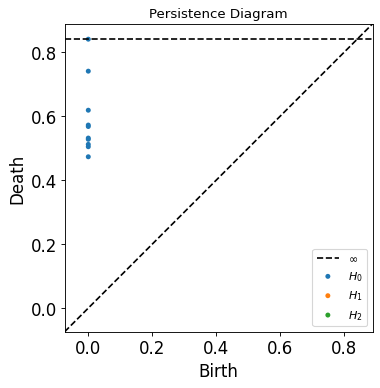

In [55]:
pm_data = np.array(intermediate_outputs[0][:,0,:])

# Instantiate Vietoris-Rips solver
rips = Rips(maxdim=2)
dgm = rips.fit_transform(pm_data)

plt.figure(figsize=(5, 5), dpi=80)
plt.rcParams.update({'font.size': 15})
persim.plot_diagrams(dgm, title="Persistence Diagram")
# print(f"rips.r_cover_ is ... {rips.r_cover_}")
# plt.savefig("homology_example_persistence-diagram.png", dpi='figure', format=None, metadata=None,
#         bbox_inches=None, pad_inches=0.1,
#         facecolor='white', edgecolor='auto')

Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)
Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbos

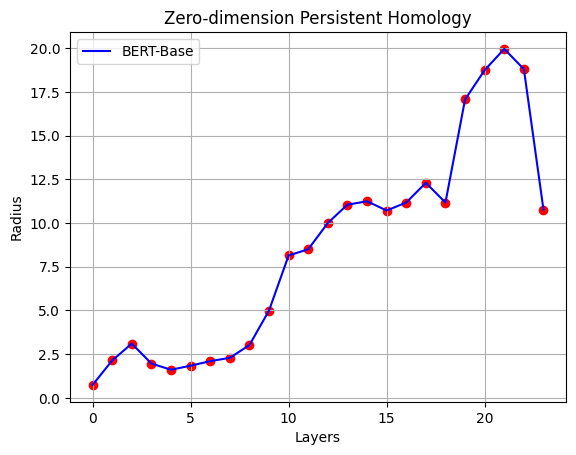

In [58]:
r_f_list = []
for layer_idx, tensor in intermediate_outputs.items():
    # 计算最小半径
    r_f, _ = compute_rf_vr(tensor[:, 0, :])
    r_f_list.append(r_f)
    # print(f"Layer {layer_idx} -- radis -- {r_f}")
    
#---------------------------------------------------------------------------------------------------
p_num = len(bert_model.encoder.layer)
x = np.linspace(0, p_num, 1)  # 在 0 到 10 之间生成 100 个等间距的点
x = np.arange(p_num)
y = r_f_list  

plt.plot(x, y, label="BERT-Base", color='b', linestyle='-')
plt.scatter(x, y, color='r', marker='o')
plt.title("Zero-dimension Persistent Homology")
plt.xlabel("Layers")
plt.ylabel("Radius")

plt.grid(True)
plt.legend()
plt.show()

## ChatGPT-based VR complex computation

In [15]:
def compute_min_radius_vr(vectors):
    """
    计算基于 Vietoris-Rips 复形，使所有向量最终合并为一个连通分量的最小半径 r_f。
    """
    # 计算欧几里得距离矩阵
    distance_matrix = dist.pdist(vectors, metric='euclidean')
    
    # 转换为方阵形式
    distance_matrix = dist.squareform(distance_matrix)
    
    # 构造 VR 复形
    rips_complex = gd.RipsComplex(distance_matrix=distance_matrix)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    
    # 获取所有 1-维单纯形（边）的死亡时间，即当它们形成连通分量时的最大半径
    edges = [simplex for simplex in simplex_tree.get_filtration() if len(simplex[0]) == 2]
    # 找到形成单一连通分量的最小半径 r_f
    r_f = max(edge[1] for edge in edges)
    return r_f

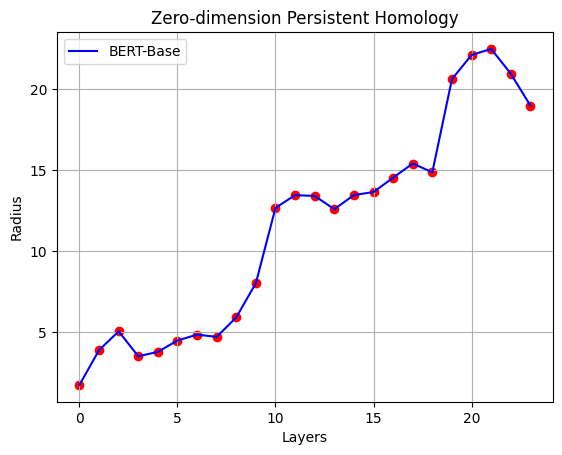

In [26]:
r_f_list = []
for layer_idx, tensor in intermediate_outputs.items():
    # 计算最小半径
    r_f = compute_min_radius_vr(tensor[:, 0, :])
    r_f_list.append(r_f)
    # print(f"Layer {layer_idx} -- radis -- {r_f}")
    
#---------------------------------------------------------------------------------------------------
p_num = len(bert_model.encoder.layer)
x = np.linspace(0, p_num, 1)  # 在 0 到 10 之间生成 100 个等间距的点
x = np.arange(p_num)
y = r_f_list  

plt.plot(x, y, label="BERT-Base", color='b', linestyle='-')
plt.scatter(x, y, color='r', marker='o')
plt.title("Zero-dimension Persistent Homology")
plt.xlabel("Layers")
plt.ylabel("Radius")

plt.grid(True)
plt.legend()
plt.show()

Vietoris-Rips 复形计算的最小连通半径 r_f: 1.7585


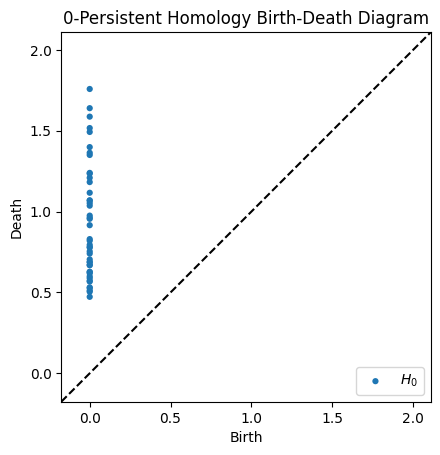

array([[0.        , 0.47292326],
       [0.        , 0.50439752],
       [0.        , 0.51169073],
       [0.        , 0.52747751],
       [0.        , 0.53138698],
       [0.        , 0.56749073],
       [0.        , 0.57203321],
       [0.        , 0.58824912],
       [0.        , 0.59928332],
       [0.        , 0.6184479 ],
       [0.        , 0.62704819],
       [0.        , 0.62729706],
       [0.        , 0.66814504],
       [0.        , 0.67085738],
       [0.        , 0.68748236],
       [0.        , 0.68799307],
       [0.        , 0.70425091],
       [0.        , 0.74049512],
       [0.        , 0.75399804],
       [0.        , 0.77786422],
       [0.        , 0.78100906],
       [0.        , 0.79429576],
       [0.        , 0.81987712],
       [0.        , 0.8300423 ],
       [0.        , 0.91600988],
       [0.        , 0.95551623],
       [0.        , 0.96208847],
       [0.        , 0.97528332],
       [0.        , 1.03679481],
       [0.        , 1.05263789],
       [0.

In [17]:
points = intermediate_outputs[0][:,0,:]

distance_matrix = dist.squareform(dist.pdist(points, metric='euclidean'))
# 构造 VR 复形
rips_complex = gd.RipsComplex(distance_matrix=distance_matrix)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)

# 获取所有 1-维单纯形（边）的死亡时间，即当它们形成连通分量时的最大半径
edges = [simplex for simplex in simplex_tree.get_filtration() if len(simplex[0]) == 2]
homology = np.array([(0, edge[1]) for edge in edges])
# 找到形成单一连通分量的最小半径 r_f
r_f = max(edge[1] for edge in edges)

print(f"Vietoris-Rips 复形计算的最小连通半径 r_f: {r_f:.4f}")

# 绘制 Birth-Death 持续同调图
# plt.figure(figsize=(8, 6))
plot_diagrams([homology], show=True, title="0-Persistent Homology Birth-Death Diagram")
# plt.axhline(y=r_f, color='r', linestyle='--', label=f"r_f = {r_f:.4f}")
# plt.legend()
# plt.show()
homology

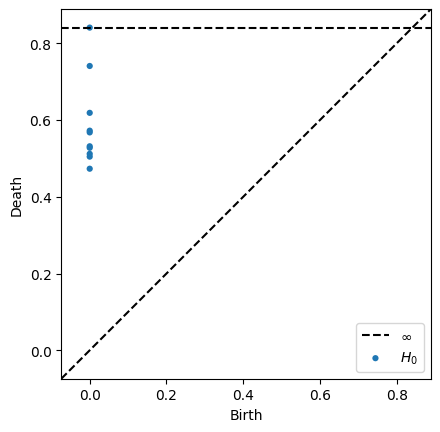

inf

In [18]:
points = intermediate_outputs[0][:,0,:]

distance_matrix = dist.squareform(dist.pdist(points, metric='euclidean'))
result = ripser(distance_matrix, maxdim=0, distance_matrix=True, metric='euclidean')
diagrams = result['dgms']  # 获取生死图数据
plot_diagrams(diagrams, show=True)

min_connect_radius=np.max(diagrams[0][:, 1])
min_connect_radius